## High-level Operations on Digital Images

Before addressing the challenges of image processing and compression, it pays off to examine a sequence of basic operations we perform on images.  These operations are the building blocks of the algorithms we are to explore.  By themselves, they beautifully illustrate the basic principle of Mathematical Imaging: An image is represented as a mathematical object, and as such, basic operations on the corresponding object can be translated to either physical operations or queries on the corresponding image.

### Object Measurements

In the setting of binary images, we may regard an image as a set of objects or _blobs_ (in white) on an empty region of the plane (the background, in black).  It is then possible to perform different measures on each of the objects represented.

In [1]:
import numpy as np, matplotlib.pyplot as plt
from skimage.data import hubble_deep_field

%matplotlib inline

image = (hubble_deep_field()[:,:,0] > 120)

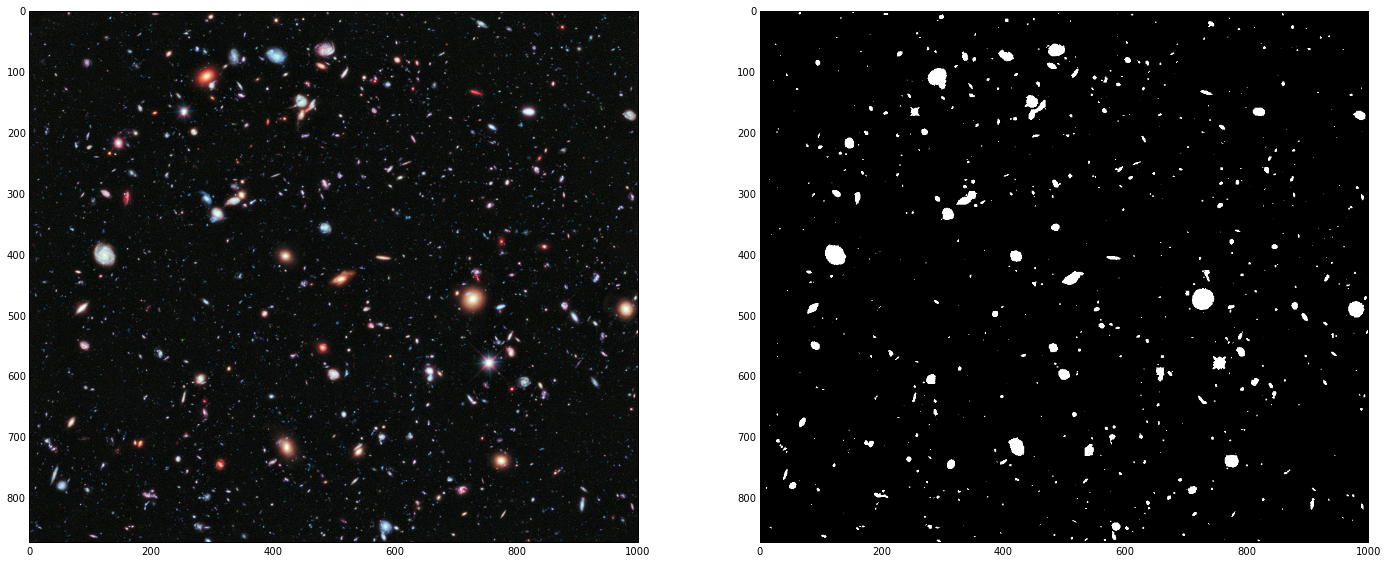

In [3]:
plt.figure(figsize=(24,12))
plt.subplot(121)
plt.imshow(hubble_deep_field())
plt.subplot(122)
plt.imshow(image)
plt.gray()
plt.show()

> _Hubble eXtreme Deep Field_. The image on the left shows the farthest ever view of the universe.  It was captured for NASA by the Hubble Telescope and uploaded to +HubbleSite.org+.  It may be freely used in the public domain.

The image on the right (a binary image) collects as subsets of `True` values, a selection of the celestial objects represented in the original image.  We obtained this binary image by a simple thresholding operation, where we asked for those pixels where the red intensity of the picture is greater than 120.  

From this binary image, we can easily label and count the selected celestial objects, and compute some of their geometric properties. We do so by using the function `label` in the library `scipy.ndimage`.


In [4]:
from scipy.ndimage import label

labels, num_features = label(image)
print "Image contains " + str(num_features) + " celestial objects."

Image contains 727 celestial objects.


Computing the center of mass of each object, for example, is performed with the function `center_of_mass`.

In [5]:
from scipy.ndimage import center_of_mass

for k in range(1,11):
    location = str(center_of_mass(image, labels, k))
    print "Object " + str(k) + " has center of mass at " + location

Object 1 has center of mass at (0.0, 875.5)
Object 2 has center of mass at (4.7142857142857144, 64.857142857142861)
Object 3 has center of mass at (3.3999999999999999, 152.19999999999999)
Object 4 has center of mass at (6.0454545454545459, 206.13636363636363)
Object 5 has center of mass at (5.0, 489.5)
Object 6 has center of mass at (6.5, 858.0)
Object 7 has center of mass at (6.0, 586.5)
Object 8 has center of mass at (7.1111111111111107, 610.66666666666663)
Object 9 has center of mass at (10.880000000000001, 297.45999999999998)
Object 10 has center of mass at (12.800000000000001, 132.40000000000001)


### Mathematical Morphology

Again in the setting of binary images, we have another set of interesting operations: *Mathematical Morphology*.  A basic morphological operation consists in _probing_ the shape of the blobs with a common structuring element.  

Consider for example the basic operations of *erosion* and *dilation* of shapes, using a small square as structuring element. 

Erosion on an object is the set of points of said object that can be reached by the center of the structuring element, when this set moves inside of the original object.  Dilation of an object, on the other hand, is the set of points covered by the structuring element, when the center of this moves inside the original object.  The combination of sequences of these two operations lead to more very powerful algorithms in image editing.

Also, let us observe two more advanced morphological operations: the computation of the *skeleton* of a shape, and the location of the *medial axis* if a shape (the ridges of its distance transform).  These operations are also the seed of interesting processes in image analysis.

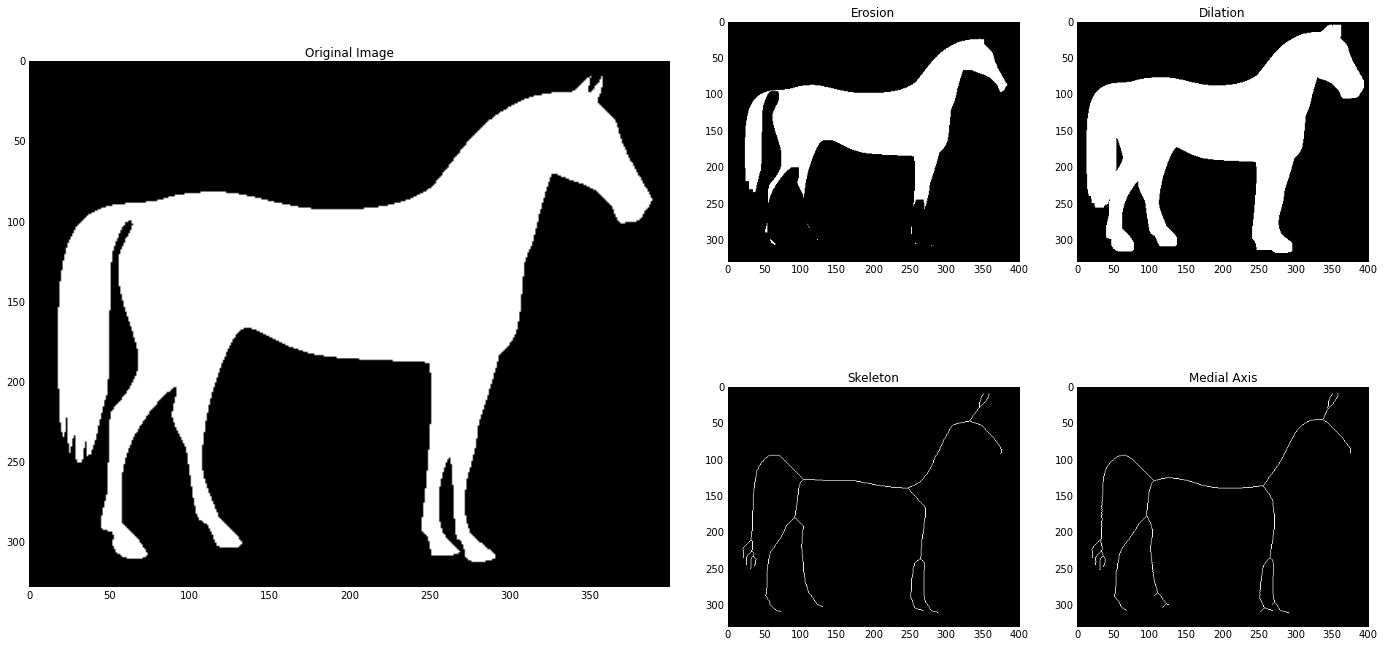

In [8]:
from scipy.ndimage.morphology import binary_erosion, binary_dilation
from skimage.morphology import skeletonize, medial_axis
from skimage.data import horse

image = horse()[:,:,0]==0

# Morphology via scipy.ndimage.morphology 
structuring_element = np.ones((10,10))
erosion = binary_erosion(image, structuring_element)
dilation = binary_dilation(image, structuring_element)

# Morphology via skimage.morphology
skeleton = skeletonize(image)
md_axis  = medial_axis(image)

plt.figure(figsize=(24,12))
plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=2)
plt.imshow(image)
plt.gray()
plt.title('Original Image')
plt.subplot2grid((2,4), (0,2))
plt.imshow(erosion)
plt.title('Erosion')
plt.subplot2grid((2,4), (0,3))
plt.imshow(dilation)
plt.title('Dilation')
plt.subplot2grid((2,4), (1,2))
plt.imshow(skeleton)
plt.title('Skeleton')
plt.subplot2grid((2,4), (1,3))
plt.imshow(md_axis)
plt.title('Medial Axis')
plt.show()

> _Black and white silhouette of a horse_, drawn and uploaded by Andreas Preuss into public domain for `openclipart.org`.


### Smoothing Filters

We may regard an image as a multivariate function.  In that case, there are a few operations that compute an _approximation_ to the original with certain good properties.  Case in point, is the creation of _smoothed_ versions of images.  These are building blocks of algorithms where the presence of noise or unnecessarily complicated textures could offer confusing results.

Take for example a Gaussian filter: the convolution of a function with a Gaussian kernel with mean $\mu=0$ and user-defined standard deviation $\sigma$.


In [10]:
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray
from skimage.data import coffee

image = coffee()

smooth_image = gaussian_filter(rgb2gray(image), sigma=2.5)

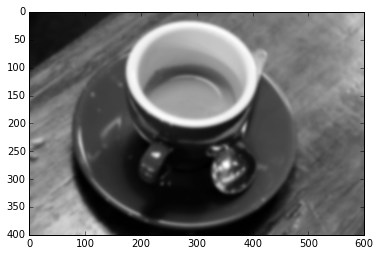

In [11]:
plt.imshow(smooth_image)

Note that the image on the right (the smoothed version of the original) seems blurred.  For this reason, understanding the mechanisms of smoothing is also a good stepping stone with algorithms of restoration of images.

### Multivariate Calculus

By regarding an image as a sufficiently smooth intensity function now (with or without the help of smoothing filters) many operations are available in terms of multi-variate Calculus techniques.  For example, the Prewitt and Sobel operators compute approximations to the norm of the gradient of said function.   The corresponding values at each location assess the probability of having an edge, and are therefore used in the construction of reliable feature-detection algorithms.

In [12]:
from scipy.ndimage import prewitt

gradient_approx = prewitt(smooth_image)

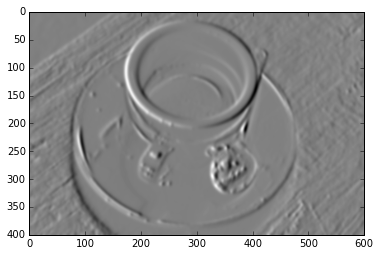

In [13]:
plt.imshow(gradient_approx)

Due to the properties of the original `image` and its smoothed version, in this case the absolute value of the magnitudes of the gradient (right) range from 0 (black) to 0.62255043871863613 (white).  Brighter areas thus indicate the location of possible edges, while darker areas imply the location of flatter regions.

The sum of second-derivatives (the Laplacian operator) is also used in algorithms of feature detection or motion estimation:

In [14]:
from scipy.ndimage import laplace

laplace_approx = laplace(smooth_image)

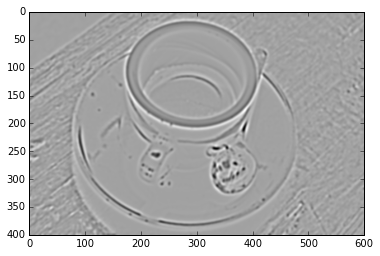

In [15]:
plt.imshow(laplace_approx)

In this case, the combination of the information of the Laplacian with the gradient, gives clues to the location of local extrema and the geometry of the objects represented.  

The *Hessian matrix* (the second order partial derivatives of a scalar-valued function), is used to describe the local curvature of the image.  It is a useful component in the process of detection of blobs.  We have an implementation of this operator in the module `skimage.feature`, as the routine `hessian_matrix`.  For an approximation to the determinant of the Hessian, we have the routine `hessian_matrix_det`, in the same module.

### Statistical filters

Treating an image as a multi-dimensional signal, we have available many filtering operations of a statistical nature.  

For instance, maximum, minimum, median, or percentile filters can be computed using respectively the functions `maximum_filter`, `minimum_filter`, `median_filter` or `percentile_filter` in `scipy.ndimage`.  These filters compute, for each pixel on the image, and a given footprint, the maximum, minimum, median, or requested percentile of the image on the footprint centered at the pixel.  In the following example, we compute the 80% percentile using as a footprint a 10-by-10 square.

In [16]:
from scipy.ndimage import percentile_filter

prctl_image = percentile_filter(image[:,:,0], percentile=-20, size=10)

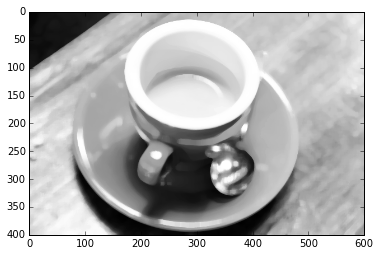

In [17]:
plt.imshow(prctl_image)

More relevant filters from this category can be found in the submodule `skimage.filters.rank`.

### Fourier Analysis

By regarding an image as a multivariate function again, we may perform Fourier analysis on it.  Applications of the *Fourier transform* and *Discrete Cosine transform* are mainly aimed to filtering, extracting information of the images, and compression.

In [19]:
from scipy.fftpack import fft2, ifft2, fftshift
from skimage.data import text

image = text()

frequency = fftshift(fft2(image))

The frequency of a function is in general a complex valued function.  To visualize it, we will present the module and angle of each output value.  For a better interpretation, we usually enhance visually the result by applying a logarithmic correction over the module of the frequency.

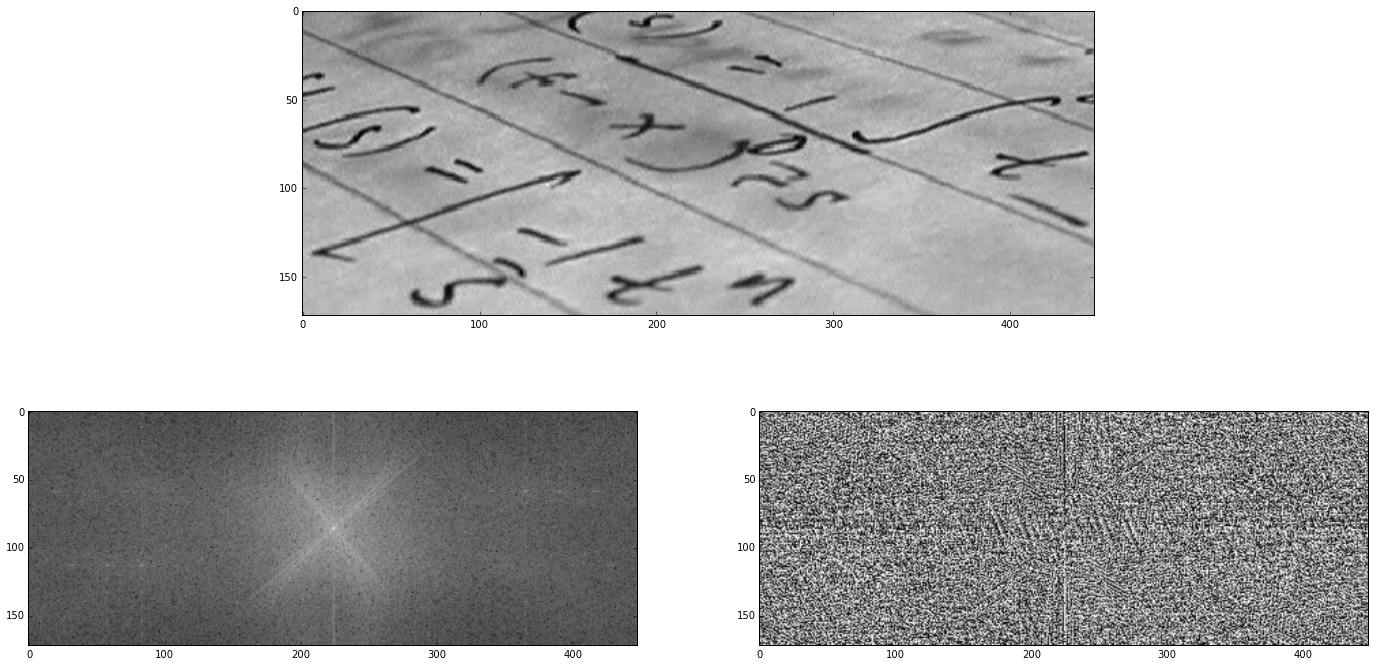

In [21]:
plt.figure(figsize=(24,12))
ax1 = plt.subplot2grid((2,2), (0,0), colspan=2)
plt.imshow(image)

module = np.absolute(frequency)
angles = np.angle(frequency)

from skimage.exposure import adjust_log

ax2 = plt.subplot2grid((2,2), (1,0))
plt.imshow(adjust_log(module))
ax3 = plt.subplot2grid((2,2), (1,1))
plt.imshow(angles)
plt.show()

> *Text* is an image downloaded from Wikipedia at en.wikipedia.org/wiki/File:Corner.png, and released to public domain.  It has no known copyright restrictions.

Notice what happens if we disregard part of the information from the frequency of the image---say, about 25% of it---, and then perform an inversion:

In [22]:
frequency.shape

(172, 448)

In [23]:
smaller_frequency = frequency[:,448/2-172/2:448/2+172/2]

new_image = ifft2(smaller_frequency)
new_image = np.absolute(new_image)

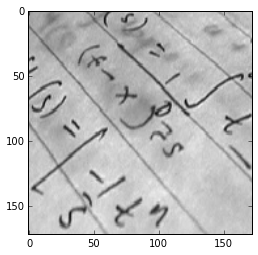

In [24]:
plt.imshow(new_image)

Although we are missing a fourth of the original frequency, the inversion gives us an image with exactly the same information as the original!  What have we actually lost by disregarding that portion of the lower frequencies?  The answer to this question leads to interesting algorithms of reconstruction, compression and analysis.

### Wavelet decompositions

We may perform wavelet decompositions using the package `PyWavelets`, written by Tariq Rashid.  

[NOTE]
============================================================================
> The original package can be downloaded from +pypi.python.org/pypi/PyWavelets+, and posterior installation can be done following instructions from those pages.  For some architectures the installation may be tricky.  We recommend in these cases to work from within a Scientific Python distribution like `anaconda`. For instance, we may search for the package using a `binstar` command:

>        % binstar search -t conda pywavelets

>        Using binstar api site https://api.binstar.org
>        Run 'conda server show <USER/PACKAGE>' to get more details:
>        Packages:
>             Name                      |  Version | Package Types   | Platforms      
>             ------------------------- |   ------ | --------------- | ---------------
>             alain/pywavelets          |    0.2.2 | conda           | linux-64       
>                                                  : PyWavelets, wavelet transform
>             auto/pywavelets           |    0.2.2 | conda           | linux-64       
>                                                  : http://www.pybytes.com/pywavelets/
>             dgursoy/pywavelets        |    0.2.2 | conda           | linux-64, osx-64
>                                                  : PyWavelets, wavelet transform
>        Found 3 packages

> The relevant package for my MacOS X is the last one.  Installation can then be finished by issuing the following command


>        % conda install --channel https://conda.binstar.org/dgursoy pywavelets

Note there are many different families of wavelets implemented in this library

In [25]:
import pywt

pywt.families()

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey']

In [26]:
print pywt.wavelist()

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


Let us show how to compute a representation of the classic image `skimage.data.camera` using a Haar wavelet.  Since the original image has side length `512=2^9`, we are going to need nine levels in the computation of the wavelet coefficients:

In [28]:
from skimage.data import camera

levels = int(np.floor(np.log2(camera().shape).max()))
print "We need {} levels".format(levels)

We need 9 levels


In [29]:
wavelet = pywt.Wavelet('haar')

wavelet_coeffs = pywt.wavedec2(camera(), wavelet, level=levels)

The object `wavelet_coeffs` is a tuple with ten entries: the first one is the approximation at the highest level: 0. This is always one single coefficient.  The second entry in `wavelet_coeffs` is a 3-tuple containing the three different details (horizontal, vertical and diagonal) at level 1. Each consecutive entry is a 3-tuple containing the three different details at higher levels (`n = 2, 3, 4, 5, 6, 7, 8, 9.`)

Note the number of coefficients for each level:


In [30]:
for index, level in enumerate(wavelet_coeffs):
    if index>0:
        value = level[0].size + level[1].size + level[2].size
        print "Level {}: {}".format(index, value)
    else:
        print "Level 0: 1"

Level 0: 1
Level 1: 3
Level 2: 12
Level 3: 48
Level 4: 192
Level 5: 768
Level 6: 3072
Level 7: 12288
Level 8: 49152
Level 9: 196608
